## $$ Time \ Series \ Analysis (for \ top \ 2 \ categories) $$

Time Series:
usecase : To predict which category would be in demand among Digital Music and Office Product



**My Assumptions:**Here I have taken the top 2 categories which are having high sales among  years and predicted the data for those 2 categories.


## **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import random
import plotly.express as px

## **To Load Data**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/exported files/A_final_data.csv")

In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
df=data[['date','main_cat']]

In [ ]:
df

,date,main_cat
0,2002-07-08,Movies & TV
1,2016-06-21,Movies & TV
2,2015-11-18,Movies & TV
3,2015-01-21,Movies & TV
4,2013-02-02,Movies & TV
...,...,...
1373577,2018-08-09,Industrial & Scientific
1373578,2018-04-09,Industrial & Scientific
1373579,2017-11-12,Industrial & Scientific
1373580,2017-09-03,Industrial & Scientific


In [ ]:
# to check whether the data is in order or not
df['date'].is_monotonic_increasing

False

In [ ]:
# sort date column
df.sort_values(by='date',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# check the date column is sorted or not
df['date'].is_monotonic_increasing

True

In [ ]:
# to set date column as index
df.set_index('date',inplace=True)

In [ ]:
df.head(3)

,main_cat
date,
1998-05-05,Digital Music
1998-05-09,Digital Music
1998-05-22,Digital Music


In [ ]:
df['main_cat'].value_counts()

Digital Music                    710091
Office Products                  500217
All Electronics                   60577
Amazon Home                       25566
Arts, Crafts & Sewing             15339
Industrial & Scientific           12619
Movies & TV                       12376
Tools & Home Improvement           8886
Computers                          8827
Health & Personal Care             3378
Toys & Games                       3367
Books                              2544
Sports & Outdoors                  1988
Cell Phones & Accessories          1047
Tools &amp; Home Improvement        809
Home Audio & Theater                799
Automotive                          740
Arts, Crafts &amp; Sewing           736
Camera & Photo                      628
All Beauty                          584
Industrial &amp; Scientific         581
Amazon Fashion                      523
Software                            226
Baby                                205
Toys &amp; Games                    195


Filtering top 2 products (i.e.Digital music and Office Products)

In [ ]:
# Top_1
Top_1=df[df['main_cat']=='Digital Music']

# Top_2
Top_2=df[df['main_cat']=='Office Products']

#Top_2
#Top_1

In [ ]:
Top_1

,main_cat
date,
1998-05-05,Digital Music
1998-05-09,Digital Music
1998-05-22,Digital Music
1998-05-31,Digital Music
1998-06-07,Digital Music
...,...
2018-09-27,Digital Music
2018-09-27,Digital Music
2018-09-29,Digital Music


In [ ]:
# Taking count using groupby()
top_1=Top_1.groupby('date')['main_cat'].count()
top_2=Top_2.groupby('date')['main_cat'].count()

In [ ]:
# Resampling the data (Monthwise)
top1=top_1.resample("M").sum()
top1=pd.DataFrame(top1)
top1

top2=top_2.resample("M").sum()
top2=pd.DataFrame(top2)
top2

,main_cat
date,
2000-05-31,1
2000-06-30,1
2000-07-31,1
2000-08-31,0
2000-09-30,2
...,...
2018-06-30,2906
2018-07-31,1967
2018-08-31,1094


In [ ]:
# Sorting the data
# Top_1
top1=top1.sort_index()

#Top_2
top2=top2.sort_index()


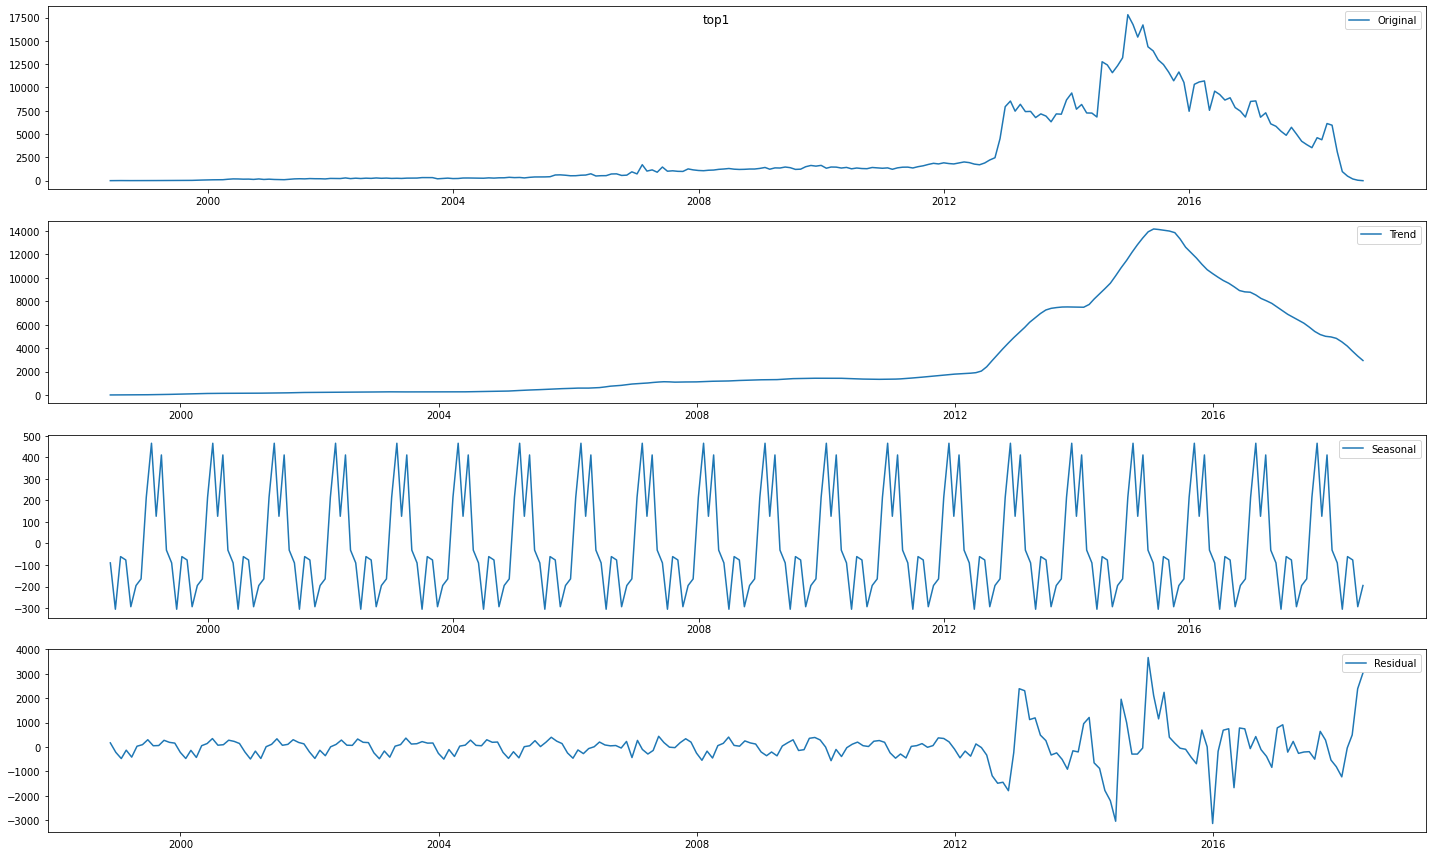

In [ ]:

decomposition1=seasonal_decompose(top1, period=12)
d_trend1=decomposition1.trend
d_seasonal1=decomposition1.seasonal
d_residual1=decomposition1.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.suptitle('top1')

plt.subplot(411)
plt.plot(top1,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend1,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal1,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual1,label='Residual') # irregularity
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
import plotly.express as ps

ps.line(d_seasonal1)

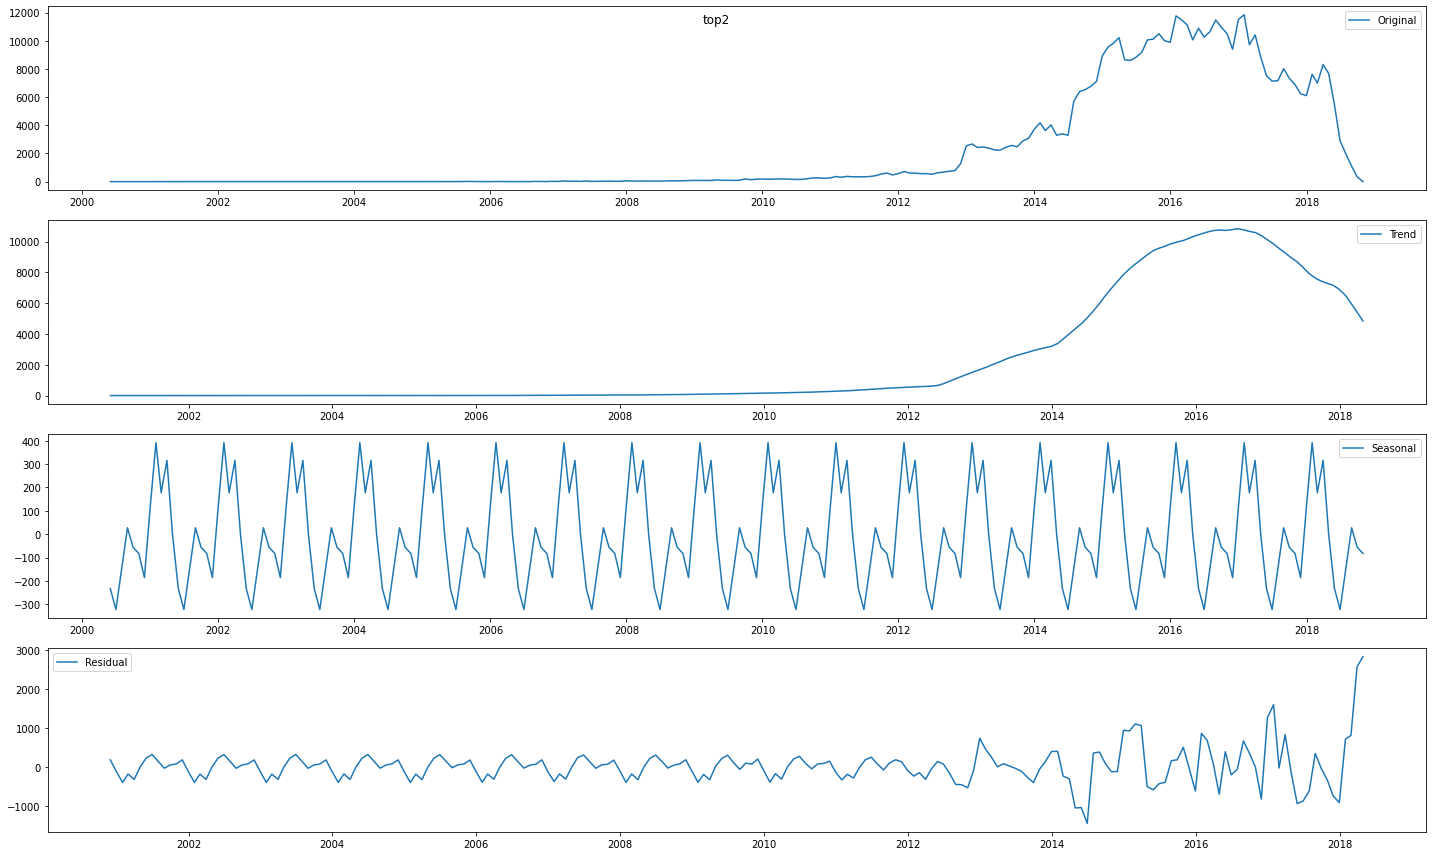

In [ ]:

decomposition1=seasonal_decompose(top2, period=12)
d_trend1=decomposition1.trend
d_seasonal1=decomposition1.seasonal
d_residual1=decomposition1.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.suptitle('top2')

plt.subplot(411)
plt.plot(top2,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend1,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal1,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual1,label='Residual') # irregularity
plt.legend(loc='best')

plt.tight_layout()

In [ ]:


ps.line(d_seasonal1)

In [ ]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data['main_cat'])[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg 

In [ ]:
print("top_1-->",checkStationarity(top1))
print("top_2-->",checkStationarity(top2))

0.5827894425069575
top_1--> pvalue=0.5827894425069575. Data is not Stationary. Make the data stationary before model building
0.036462589541040785
top_2--> pvalue=0.036462589541040785. Data is Stationary. Proceed to model building


In [ ]:
#Top_1
diff_df = top1 - top1.shift()
diff_df.dropna(inplace = True)


In [ ]:
print("top_1-->",checkStationarity(diff_df))
#print("top_2-->",checkStationarity(diff_df2))

0.0055026883604021234
top_1--> pvalue=0.0055026883604021234. Data is Stationary. Proceed to model building


Top_1_product--->Digital Music

In [ ]:
def p_and_q(d):
  fig,ax=plt.subplots(1,2,figsize=(15,5))
  plot_acf(d,lags=40,ax=ax[0])
  plot_pacf(d,lags=40,ax=ax[1]);

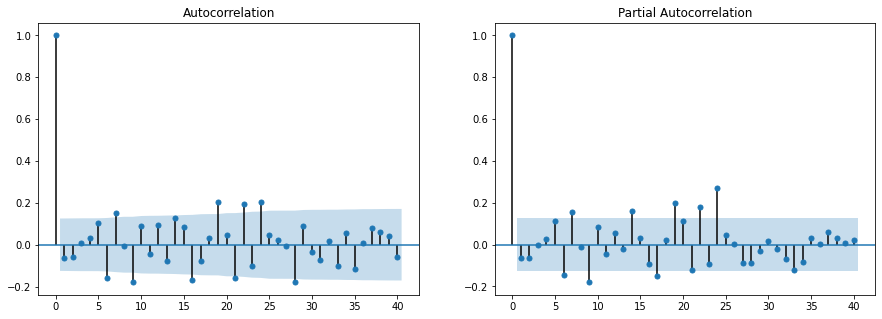

In [ ]:
# pacf,acf plots
p_and_q(diff_df)

In [ ]:

d=1
m_sarima=[]

list_sarima=[]
for p in range(6):
    for q in range(6):
        list_sarima.append((p,d,q))
        model=SARIMAX(top1,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
        m_sarima.append(model)
     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/loc

In [ ]:
aic = [] 
bic = []  
MSE = [] 
RMSE = [] 

for i in m_sarima:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(top1, forecast) #calculating mse
    rmse= mean_squared_error(top1, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [ ]:
f= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = list_sarima) 
f.sort_values(by=['RMSE'],ascending=True)

,AIC,BIC,MSE,RMSE
"(5, 1, 5)",3845.224592,3917.696399,5.531448e+05,743.737037
"(5, 1, 4)",3826.044817,3891.614547,5.645464e+05,751.363044
"(4, 1, 4)",3832.279857,3890.947511,5.724259e+05,756.588361
"(4, 1, 5)",3842.825714,3908.395445,5.731695e+05,757.079602
"(3, 1, 5)",3841.411621,3900.079275,5.770813e+05,759.658660
"(5, 1, 2)",3844.166489,3895.932066,5.797178e+05,761.392038
"(5, 1, 3)",3849.256692,3907.924346,5.804037e+05,761.842313
"(2, 1, 5)",3851.636004,3903.401581,5.817621e+05,762.733330
"(2, 1, 2)",3836.577596,3867.636942,5.905246e+05,768.456008
"(3, 1, 3)",3845.807058,3890.670558,5.942277e+05,770.861638


In [ ]:
print('min_aic:',f['AIC'].idxmin())
print('min_bic:',f['BIC'].idxmin())
print('min_mse:',f['MSE'].idxmin())
print('min_rmse:',f['RMSE'].idxmin())

min_aic: (0, 1, 3)
min_bic: (0, 1, 1)
min_mse: (5, 1, 5)
min_rmse: (5, 1, 5)


In [ ]:
# Checking model for the least scores
# least aic,bic score
p=0;q=3;d=1
mod_aic = sm.tsa.statespace.SARIMAX(top1,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt1 = mod_aic.fittedvalues
forecastt1 = mod_aic.forecast(14)
rmse_aic1 = mean_squared_error(top1,predictt1,squared= False)

# least bic score
p=0;q=1;d=1
mod_bic = sm.tsa.statespace.SARIMAX(top1,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt2 = mod_bic.fittedvalues
forecastt2 = mod_bic.forecast(14)
rmse_bic1 = mean_squared_error(top1,predictt2,squared= False)


# least mse,rmse score
p=5;q=5;d=1
model_1=sm.tsa.statespace.SARIMAX(top1,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt3 = model_1.fittedvalues
forecast_sarima1 = model_1.forecast(14)
rmse_2 = mean_squared_error(top1,predictt3,squared= False)

# Printing error scores
print('RMSE of model with least aic,bic score:',rmse_aic1)
print('RMSE of model with least bic score:',rmse_bic1)
print('RMSE of model with least mse,rmse score:',rmse_2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodel

RMSE of model with least aic,bic score: 787.0054549481653
RMSE of model with least bic score: 809.6128757192668
RMSE of model with least mse,rmse score: 743.7370370649373


In [ ]:
predictt3

date
1998-05-31       0.000000
1998-06-30       3.821673
1998-07-31       7.446460
1998-08-31      11.477455
1998-09-30       7.730865
                 ...     
2018-06-30    2546.554780
2018-07-31    1781.131701
2018-08-31     832.098279
2018-09-30   -1340.965165
2018-10-31    -187.820811
Freq: M, Length: 246, dtype: float64

In [ ]:
forecast_sarima1

2018-11-30     487.400627
2018-12-31    1313.346170
2019-01-31     628.154475
2019-02-28      -4.874180
2019-03-31    1239.939971
2019-04-30      67.418535
2019-05-31    -922.701997
2019-06-30    -718.304806
2019-07-31      25.799296
2019-08-31    -394.988056
2019-09-30    -805.388696
2019-10-31      -1.535123
2019-11-30      62.980437
2019-12-31      52.667043
Freq: M, Name: predicted_mean, dtype: float64

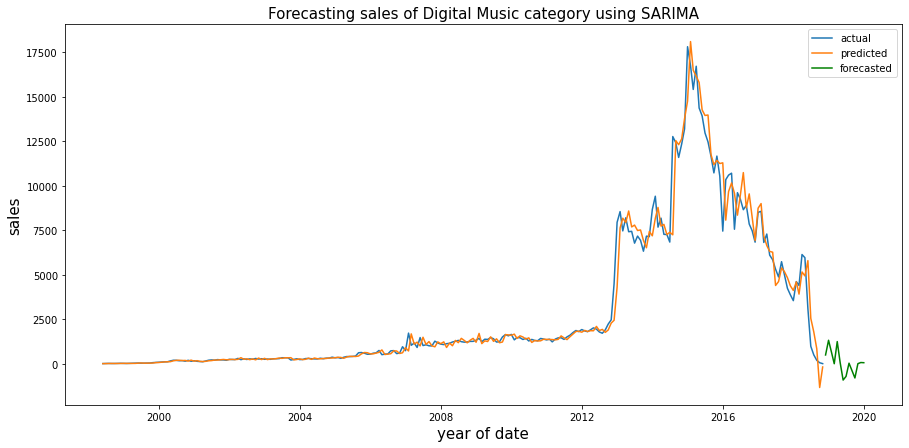

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(top1,label='actual')
plt.plot(predictt3,label='predicted')
plt.plot(forecast_sarima1,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting sales of Digital Music category using SARIMA',fontsize=15)
f2={'size':15}
plt.xlabel('year of date',fontdict=f2)
plt.ylabel('sales',fontdict=f2)
plt.show()

Top_2_Products(office products)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



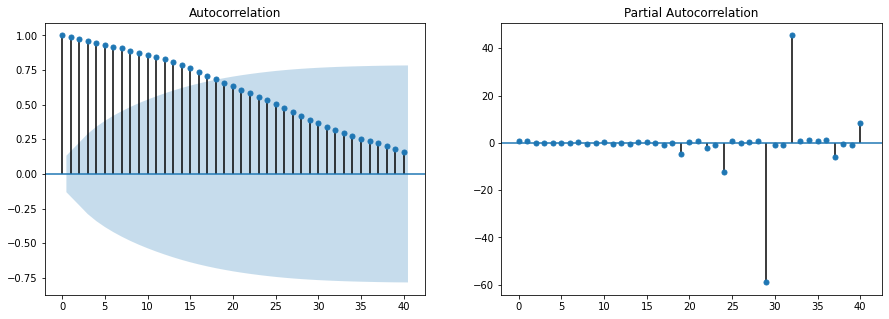

In [ ]:
#pacf,acf plots
p_and_q(top2)

In [ ]:

d=0
m_sarima=[]

list_sarima=[]
for p in range(3):
    for q in range(5):
        list_sarima.append((p,d,q))
        model=SARIMAX(top2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
        m_sarima.append(model)
     



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: M

In [ ]:
aic = [] 
bic = []  
MSE = [] 
RMSE = [] 

for i in m_sarima:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(top2, forecast) #calculating mse
    rmse= mean_squared_error(top2, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [ ]:
k= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = list_sarima) 
k.sort_values(by=['RMSE'],ascending=True)
     

,AIC,BIC,MSE,RMSE
"(1, 0, 3)",3368.236167,3398.860263,1.953410e+05,441.973967
"(2, 0, 1)",3367.974332,3391.793074,1.955360e+05,442.194540
"(2, 0, 4)",3374.004251,3418.239057,1.965429e+05,443.331629
"(2, 0, 3)",3382.198407,3419.627858,1.974173e+05,444.316624
"(1, 0, 4)",3373.839357,3411.268808,1.978511e+05,444.804615
"(1, 0, 2)",3367.002246,3390.820988,1.998737e+05,447.072314
"(2, 0, 2)",3377.912201,3408.536298,2.009001e+05,448.218774
"(2, 0, 0)",3368.420954,3385.434341,2.068079e+05,454.761362
"(1, 0, 1)",3377.069293,3394.082680,2.175817e+05,466.456584
"(1, 0, 0)",3384.293114,3394.501146,2.306380e+05,480.247815


In [ ]:
print('min_aic:',k['AIC'].idxmin())
print('min_bic:',k['BIC'].idxmin())
print('min_mse:',k['MSE'].idxmin())
print('min_rmse:',k['RMSE'].idxmin())

min_aic: (1, 0, 2)
min_bic: (2, 0, 0)
min_mse: (1, 0, 3)
min_rmse: (1, 0, 3)


In [ ]:
# Checking model for the least scores
# least aic,bic score
p=1;q=2;d=0
mod_aic = sm.tsa.statespace.SARIMAX(top2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt1 = mod_aic.fittedvalues
forecastt1 = mod_aic.forecast(14)
rmse_aic1 = mean_squared_error(top2,predictt1,squared= False)

# least bic score
p=2;q=0;d=0
mod_bic = sm.tsa.statespace.SARIMAX(top2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt2 = mod_bic.fittedvalues
forecastt2 = mod_bic.forecast(14)
rmse_bic1 = mean_squared_error(top2,predictt2,squared= False)


# least mse,rmse score
p=1;q=3;d=0
model_1=sm.tsa.statespace.SARIMAX(top2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
predictt23 = model_1.fittedvalues
forecast_sarima2 = model_1.forecast(14)
rmse_22 = mean_squared_error(top2,predictt23,squared= False)

# Printing error scores
print('RMSE of model with least aic,bic score:',rmse_aic1)
print('RMSE of model with least bic score:',rmse_bic1)
print('RMSE of model with least mse,rmse score:',rmse_22)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566:

RMSE of model with least aic,bic score: 447.0723138554103
RMSE of model with least bic score: 454.7613615300377
RMSE of model with least mse,rmse score: 441.97396747874296


In [ ]:
predictt23

date
2000-05-31       0.000000
2000-06-30       0.999369
2000-07-31       0.999282
2000-08-31       0.999348
2000-09-30      -0.164841
                 ...     
2018-06-30    4887.555997
2018-07-31    2492.150855
2018-08-31    2246.758997
2018-09-30     140.869742
2018-10-31     -14.607818
Freq: M, Length: 222, dtype: float64

In [ ]:
forecast_sarima2

2018-11-30    -849.908906
2018-12-31      -8.049961
2019-01-31     397.498095
2019-02-28    -830.192853
2019-03-31       0.199817
2019-04-30    -615.033916
2019-05-31   -2105.157628
2019-06-30   -3119.202614
2019-07-31   -3339.293154
2019-08-31   -3427.414443
2019-09-30   -3919.719401
2019-10-31   -4187.704155
2019-11-30   -4529.228942
2019-12-31   -4412.155862
Freq: M, Name: predicted_mean, dtype: float64

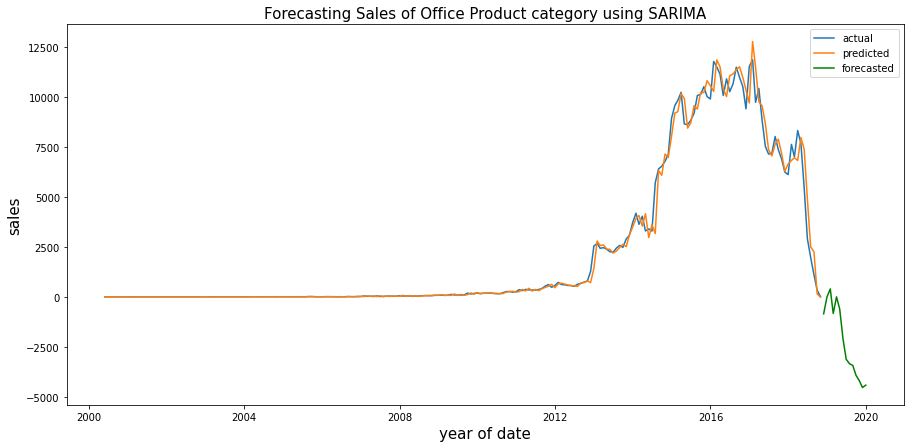

In [ ]:
plt.figure(figsize=(15,7))
f2={'size':15}

plt.plot(top2,label='actual')
plt.plot(predictt23,label='predicted')
plt.plot(forecast_sarima2,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting Sales of Office Product category using SARIMA',fontsize=15)
plt.xlabel('year of date',fontdict=f2)
plt.ylabel('sales',fontdict=f2)
plt.show()

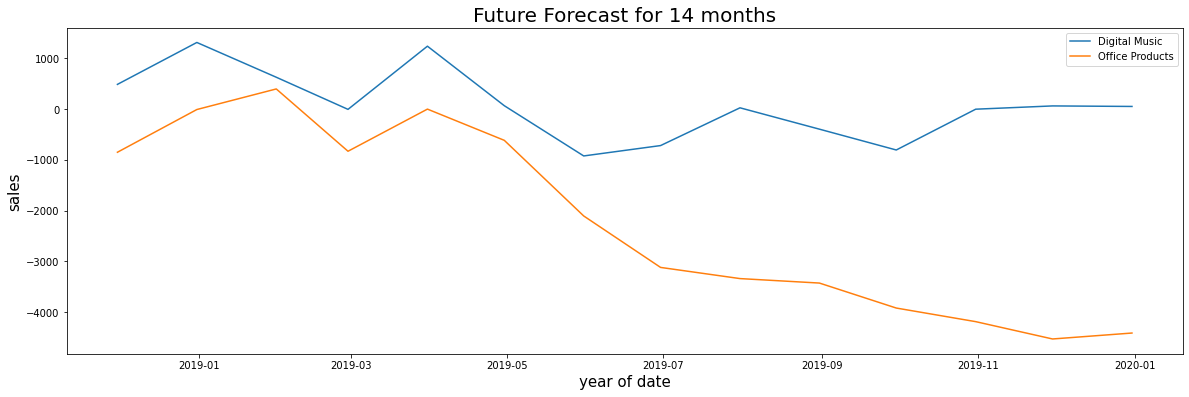

In [ ]:
plt.figure(figsize=(20,6))
f1={'size':20}
f2={'size':15}
plt.title('Future Forecast for 14 months',fontdict=f1)
plt.plot(forecast_sarima1,label='Digital Music')
plt.plot(forecast_sarima2,label='Office Products')
plt.xlabel('year of date',fontdict=f2)
plt.ylabel('sales',fontdict=f2)
plt.legend()
plt.show()

## We compared with other models, the better predictions happened in SARIMA model. SARIMA model is best for this analysis.
* The demanded category would be Digital Music
* And links to access other models is given below


[Arima code link](https://colab.research.google.com/drive/1d66jJQeMHHJN6010VX8BWGpYyKah3uGk)

[Triple code link](https:https://colab.research.google.com/drive/17K8G8dxLPw_G9OWhsB-J_7R0oG_J-LA0?usp=share_link/)